# EE Network Experiment (processing data)

- ***Execute locally***
- ***Execute all the cells below for the first time***


## Initialisation

### Import Modules

In [ ]:
import re
import csv
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

### Define Grapher

In [1]:
def show(dataset_name, model_name):
    # plt config
    fig = plt.figure(figsize=(12, 8), dpi=100)
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    fig.suptitle(f'{dataset_name} {model_name}', fontsize=18, y=0.95)
    ax1.set_title('Valdation accuracy')
    ax2.set_title('Filtered validation accuracy')
    ax3.set_title('Validation loss')
    ax4.set_title('Filtered validation loss')
    fig.text(0.5, 0.04, 'Number of epochs', ha='center', fontsize=12)
    fig.text(0.06, 0.5, 'Validation accuracy / loss', va='center', rotation='vertical', fontsize=12)
    
    def get_data(metrics):
        data = {}
        dir_paths = glob(f'./data/{dataset_name}_{model_name}_*')
        dir_paths.sort()
        for dir_path in dir_paths:
            optimizer_name = re.search(r'./data/.+_.+_(.+)', dir_path).group(1)
            temp = []
            for path in glob(f'{dir_path}/*/result.csv'):
                with open(path) as f:
                    rows = np.array([row for row in csv.reader(f)])
                idx = np.where(rows[0] == metrics)[0]
                rows = rows[1:, idx]
                rows = rows.astype(np.float64)
                temp.append(rows)
            data[optimizer_name] = np.average(np.array(temp), axis=0)
        return data

    acc_data = get_data('val_accuracy')
    loss_data = get_data('val_loss')
    
    # plot
    for optimizer_name, y in acc_data.items():
        x = np.arange(0, len(y), 1)
        filtered_y = gaussian_filter1d(y, sigma=10)
        
        ax1.plot(x, y, label=optimizer_name)
        ax2.plot(x, filtered_y, label=optimizer_name)
        
    for optimizer_name, y in loss_data.items():
        x = np.arange(0, len(y), 1)
        filtered_y = gaussian_filter1d(y, sigma=10)
            
        ax3.plot(x, y, label=optimizer_name)
        ax4.plot(x, filtered_y, label=optimizer_name)
        
    # show graph with legend
    plt.legend(bbox_to_anchor=(1.4, 2.2), loc='upper right', borderaxespad=1)
    plt.show()


def show_minstd(dataset_name, model_name):
    # plt config
    fig = plt.figure(figsize=(12, 4), dpi=100)
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    fig.suptitle(f'{dataset_name} {model_name}', fontsize=18, y=1.02)
    ax1.set_title('Maximum validation accuracy')
    ax2.set_title('Standard deviation on validatioin accuracy')
    
    data = {}
    dir_paths = glob(f'./data/{dataset_name}_*_{model_name}')
    dir_paths.sort()
    for dir_path in dir_paths:
        optimizer_name = re.search(r'./data/.+_(.+)_.+', dir_path).group(1)
        temp = []
        for path in glob(f'{dir_path}/*/result.csv'):
            with open(path) as f:
                rows = np.array([row for row in csv.reader(f)])
            idx = np.where(rows[0] == 'val_accuracy')[0]
            rows = rows[:, idx]
            rows = rows[1:]
            rows = rows.astype(np.float64)
            temp.append(data)
        data[optimizer_name] = np.average(np.array(temp), axis=0)
    return data
    
    optimizer_names, ys = data.keys(), data.values()
    max_ys = [np.max(y) for y in ys]
    std_ys = [np.std(y) for y in ys]
    x = ['' for _ in range(len(ys))]
        
    ax1.bar(x, max_ys, align='center', tick_label=optimizer_names)
    ax2.bar(x, std_ys, align='center', tick_label=optimizer_names)
    ax1.set_xticklabels(optimizer_names, rotation=45)
    ax2.set_xticklabels(optimizer_names, rotation=45)

    # show entire graph
    plt.show()

    
def show_time():
    # plt config
    fig = plt.figure(figsize=(12, 8), dpi=100)
    fig.suptitle('Time', fontsize=18, y=0.95)
    fig.text(0.5, 0.04, 'Number of epochs', ha='center', fontsize=12)
    fig.text(0.06, 0.5, 'Time in seconds', va='center', rotation='vertical', fontsize=12)
    
    def get_data(dataset_name):
        data = {}
        dir_paths = glob(f'./data/{dataset_name}_*_*/')
        dir_paths.sort()
        for dir_path in dir_paths:
            optimizer_name = re.search(r'./data/.+_(.+)_', dir_path).group(1)
            temp = []
            for path in glob(f'{dir_path}/*/time.csv'):
                with open(path) as f:
                    rows = np.array([row for row in csv.reader(f)])
                rows = rows[1:, 1:]
                rows = rows.astype(np.float64)
                temp.append(rows)
            data[optimizer_name] = np.average(np.array(temp), axis=0)
        return data
    
    for i, dataset_name in enumerate(('mnist', 'fashion_mnist', 'cifar10', 'imdb')):
        ax = fig.add_subplot(int('22' + str(i + 1)))
        model_name = 'lstm' if dataset_name == 'imdb' else 'lenet'
        ax.set_title(f'{dataset_name} {model_name}')
        
        data = get_data(dataset_name)
        for optimizer_name, y in data.items():
            x = np.arange(0, len(y), 1)
            ax.plot(x, y, label=optimizer_name)
    
    # show entire graph
    plt.legend(bbox_to_anchor=(1.4, 2.2), loc='upper right', borderaxespad=1)
    plt.show()

## Main Results

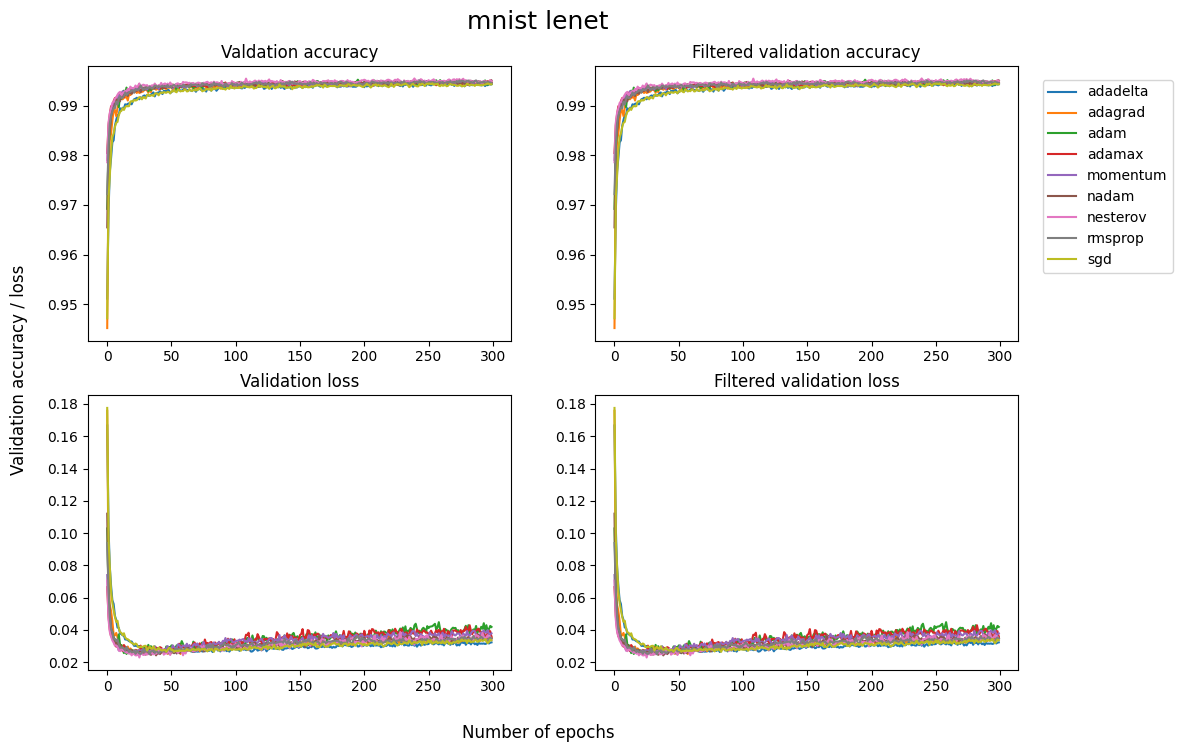

In [ ]:
show('mnist', 'lenet')

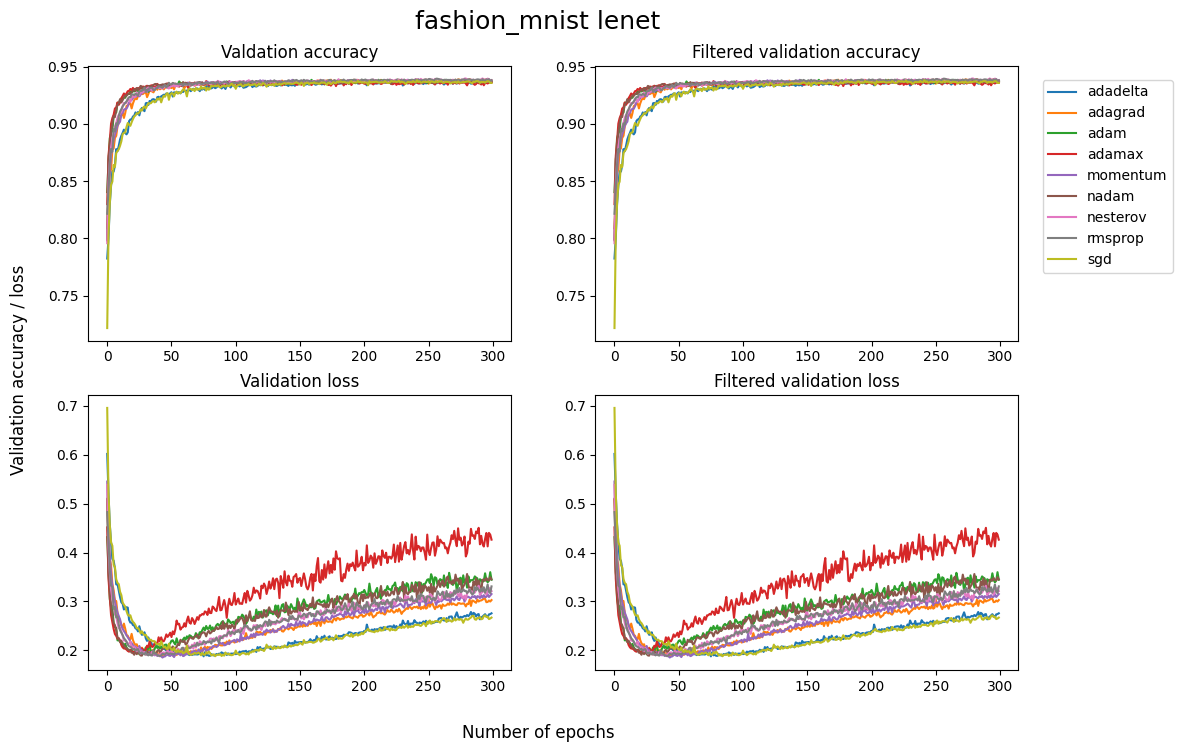

In [ ]:
show('fashion_mnist', 'lenet')

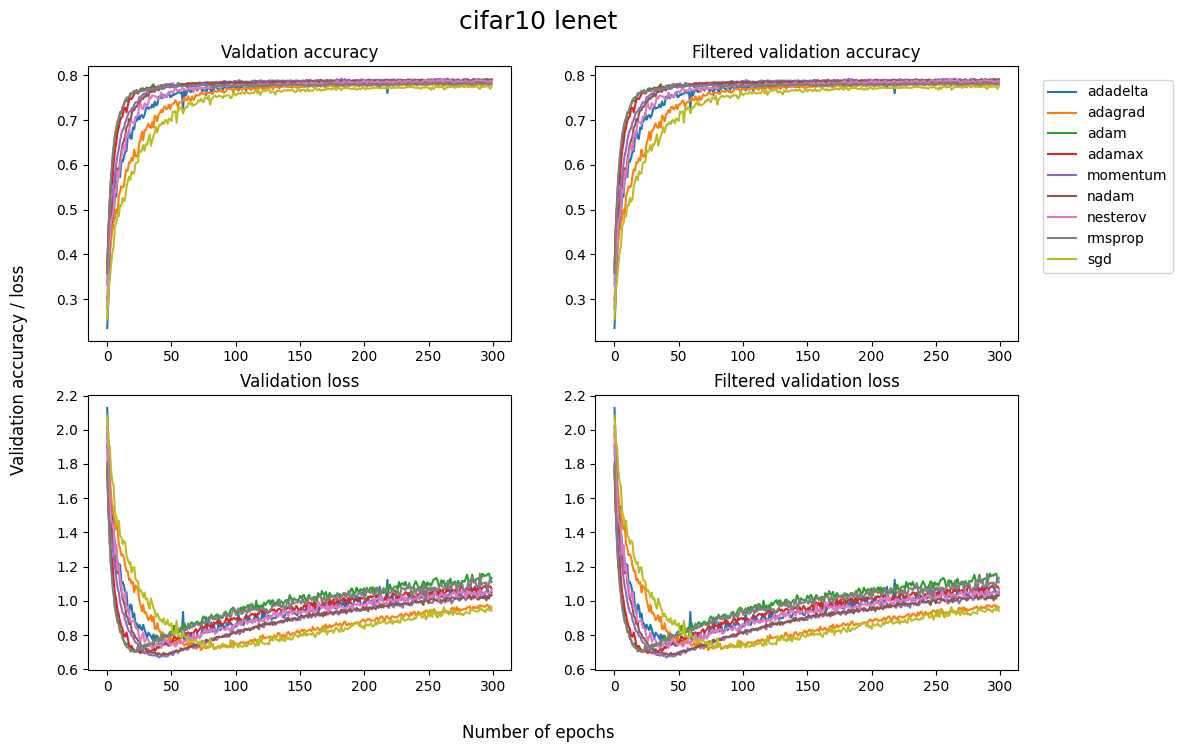

In [ ]:
show('cifar10', 'lenet')

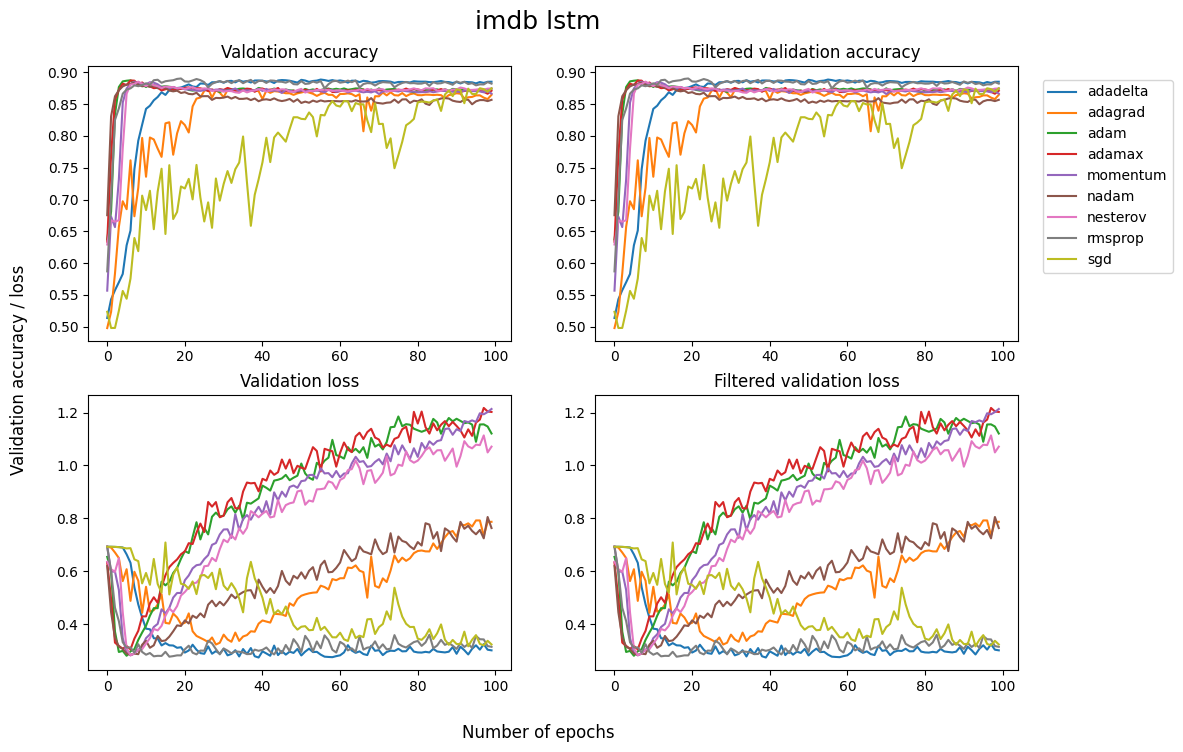

In [ ]:
show('imdb', 'lstm')

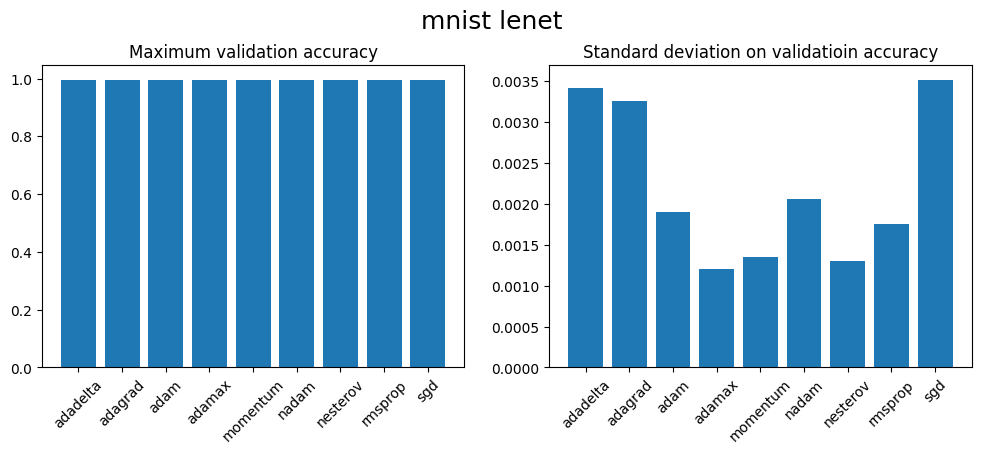

In [ ]:
show_minstd('mnist', 'lenet')

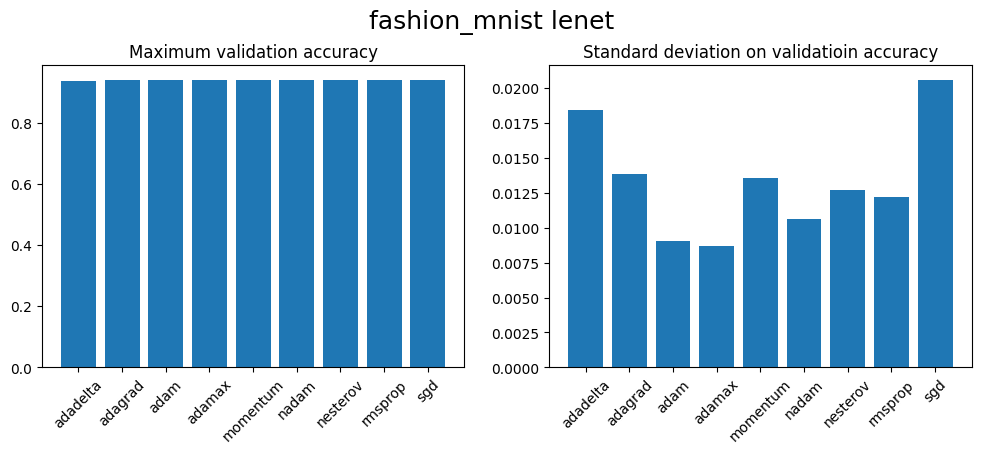

In [ ]:
show_minstd('fashion_mnist', 'lenet')

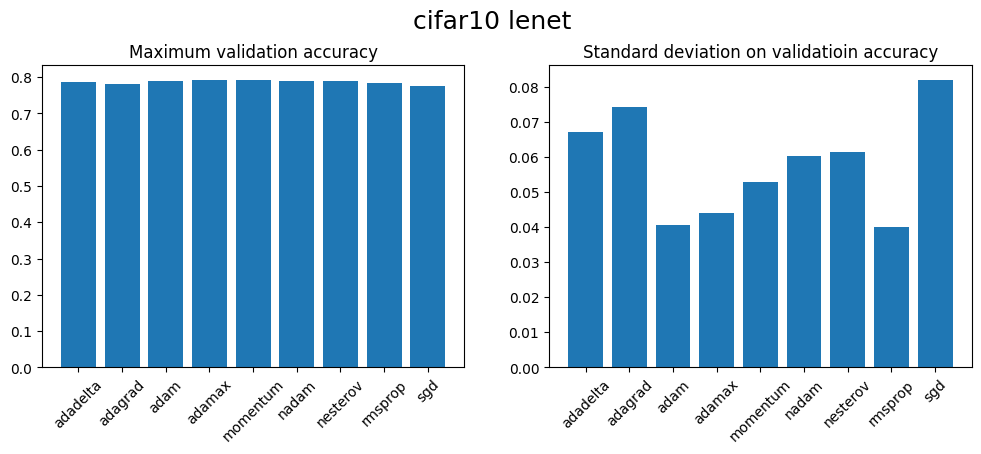

In [ ]:
show_minstd('cifar10', 'lenet')

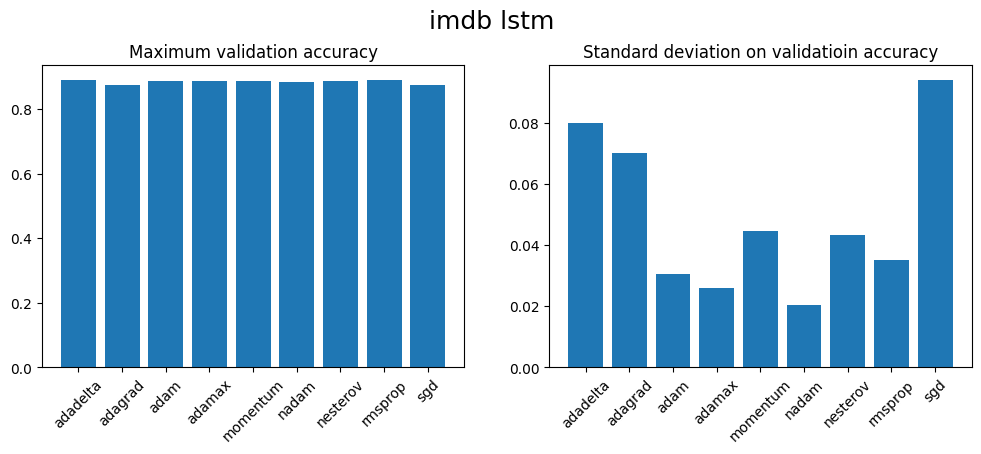

In [ ]:
show_minstd('imdb', 'lstm')

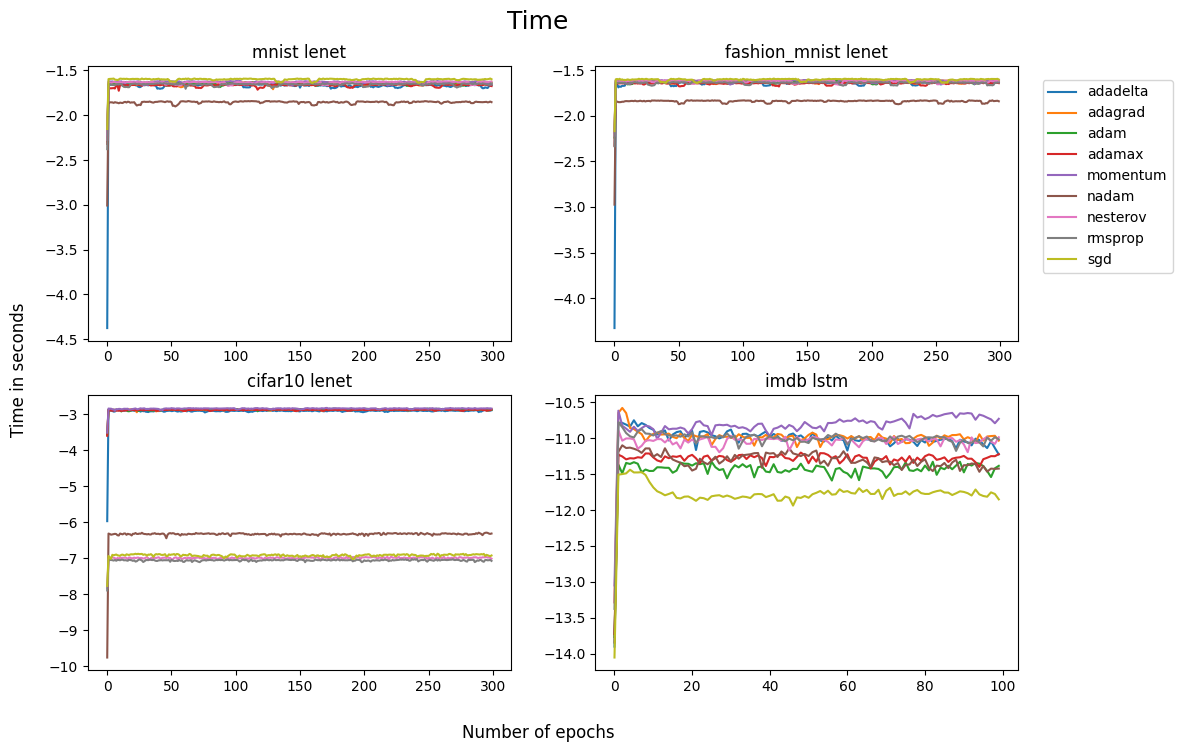

In [ ]:
show_time()